In [96]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

sym.init_printing()

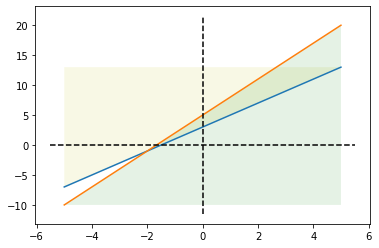

In [116]:
def horizontal_line_constant(start_y, end_y, inequality):
    horizontal_line = 0
    if inequality == '<' or inequality == '<=':
        horizontal_line = start_y if start_y < end_y else end_y

    if inequality == '>' or inequality == '>=':
        horizontal_line = start_y if start_y > end_y else end_y

    return horizontal_line


def draw_grid():
    axis = plt.gca()
    plt.plot(axis.get_xlim(), [0, 0], 'k--')
    plt.plot([0, 0], axis.get_ylim(), 'k--')


def graph_line_inequality(lines, inequality):
    fig, ax = plt.subplots()
    x = np.linspace(-5, 5, 101)
    colors = ['y', 'g']

    for i in range(0, len(lines)):
        m, b = lines[i]
        y = m * x + b

        line_inequality = inequality[i]
        start_y = y[0]
        end_y = y[-1]

        # Draw a horizontal line to create a triangle to fill in to show the inequality
        horizontal_line = horizontal_line_constant(start_y, end_y, line_inequality)

        plt.plot(x, y)
        ax.fill_between(x, y, horizontal_line, facecolor=colors[i], alpha=.1)

    draw_grid()
    plt.show()


graph_line_inequality([[2, 3], [3 / 1, 5]], ['>', '<'])